# Information Based Model
## Calculating optimal Bid and Ask

### Axel Santiago Molina Ceja
### Pablo Lemus

# Overview

In their influential article "Information Effects on the Bid-Ask Spread," Thomas E. Copeland and Dan Galai (1983) explore the intricate relationship between information asymmetry and the bid-ask spread in financial markets. They propose a model where the dealer's bid-ask spread is determined by a tradeoff between expected losses from informed traders—who possess superior information—and expected gains from liquidity traders, who engage in transactions for reasons unrelated to information. This foundational work identifies key determinants of the bid-ask spread, including price level, return variance, and market activity, providing a framework for understanding how these factors influence trading costs.

Building upon their theoretical insights, we replicated their work using Python to analyze the impact of information effects on trading strategies. Initially, we employed a Weibull distribution to model price distributions, allowing for a nuanced examination of potential outcomes in trading scenarios. We then simulated expected revenue under the assumption that all trades were motivated by liquidity needs. To incorporate the complexities introduced by informed trading, we introduced a 40% probability that an informed trade would occur along with different probabilities for the Liquidity Buy and Liquidity Sell, reflecting probable (although possibly not realistic) market conditions.

Finally, we utilized Copeland and Galai's model to determine the optimal bid-ask spread in this context. This project not only reinforces their findings but also demonstrates how computational tools can be leveraged to deepen our understanding of market dynamics and inform trading strategies in the presence of asymmetric information.

The **parameters** that we will use are:
    
+ P~Weibull($\Lambda$=50, K=10)

+ $\Pi_I$ = 0.4

+ $\Pi_{LB}(S)=0.5-0.08S, where: \Pi_{LB}:[0,0.5]$

+ $\Pi_{LS}(S)=0.5-0.08S, where: \Pi_{LS}:[0,0.5]$

+ $P_0$ = 51

### Precise actions to take:

+ We will plot for the following:

    * Price distribution
    * Expected revenue if all trades are liquidity motivated, $\Pi_I$ = 0, or just $\Pi_{LS}$=0.5, $\Pi_{LB}$=0.5
    * Expected revenue if there is a 40% chance that an informed trade will be executed, and keeping the same liquidity probabilities as the previous point.
    * Expected revenue considering:
        + $\Pi_I$ = 0.4
        + $\Pi_{LB}(S)=0.5-0.08S, where \Pi_{LB}:[0,0.5]$
        + $\Pi_{LS}(S)=0.5-0.08S, where \Pi_{LS}:[0,0.5]$
    
+ Determine the optimal Bid/Ask price using Copeland & Galai's model

## Plotting the price Distribution

1. **Importing Libraries**  
   We imported `numpy` for numerical operations, `matplotlib.pyplot` for visualization, and `weibull_min` from `scipy.stats` to work with the Weibull distribution.

2. **Defining Weibull Distribution Parameters**  
   We set the scale parameter (λ = 50), shape parameter (k = 10), and a reference price (P₀ = 51).

3. **Generating Data**  
   We created an array `x` ranging from 0 to 100 with 1000 points to represent possible price values. Then, we computed the probability density function (PDF) of the Weibull distribution using these values.

4. **Plotting the Distribution**  
   - We plotted the Weibull PDF in blue.  
   - A vertical dashed red line was added at `P₀ = 51` to indicate the reference price.  
   - Labels, a title, a legend, and a grid were included for better readability.

5. **Displaying the Plot**  
   Finally, we displayed the plot using `plt.show()`, allowing visualization of the Weibull price distribution.


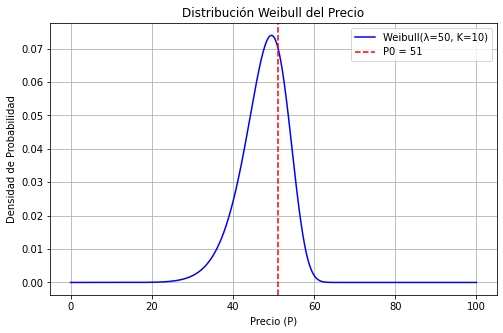

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parámetros de la distribución Weibull
lambda_ = 50  # Escala
k = 10  # Forma
P0 = 51  # Precio de referencia

# Generar valores de la distribución
x = np.linspace(0, 100, 1000)  # Rango de valores
pdf = weibull_min.pdf(x, k, scale=lambda_)

# Graficar la distribución
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f'Weibull(λ={lambda_}, K={k})', color='blue')
plt.axvline(P0, color='red', linestyle='--', label=f'P0 = {P0}')
plt.xlabel('Precio (P)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Weibull del Precio')
plt.legend()
plt.grid()
plt.show()

## Calculating expected revenue (Ask Spread) under different scenarios

1. **Importing Libraries**  
   We imported `numpy` for numerical computations and `matplotlib.pyplot` for visualization.

2. **Defining Parameters**  
   We set the proportion of informed traders (`π_I = 0.4`) and a reference price (`P₀ = 51`).

3. **Defining the `Bid_Ask` Function**  
   - We generated an array of prices ranging from `P₀` to `P₀ + 10` with 100 points.  
   - We calculated different revenue-related values:  
     - **Q-values**: The revenue assuming all traders are liquidity traders.  
     - **R-values**: The revenue when 40% of traders are informed.  
     - **PLI-values**: A probability function clipped between 0 and 0.5.  
     - **V-values**: The expected revenue considering the probability function.

4. **Plotting the Revenue Functions**  
   - We plotted `Q-values` as a dashed black line.  
   - We plotted `R-values` as a solid blue line.  
   - We plotted `V-values` as a solid green line.  
   - Labels, a title, a legend, and a grid were added for better interpretation.

5. **Displaying the Plot**  
   Finally, we called `plt.show()` to visualize the expected revenue as a function of price.


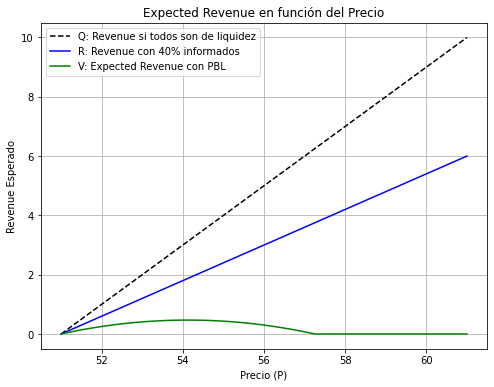

In [2]:
# Parámetros
pi_I = 0.4
P0 = 51

def Bid_Ask():
    prices = np.linspace(P0, P0 + 10, 100)
    q_values = prices - P0
    r_values = q_values * (1 - pi_I)
    pli_values = np.clip(0.5 - 0.08 * (prices - P0), 0, 0.5)
    v_values = r_values * pli_values

    plt.figure(figsize=(8, 6))
    plt.plot(prices, q_values, linestyle='--', color='black', label="Q: Revenue si todos son de liquidez")
    plt.plot(prices, r_values, linestyle='-', color='blue', label="R: Revenue con 40% informados")
    plt.plot(prices, v_values, linestyle='-', color='green', label="V: Expected Revenue con PBL")
    plt.xlabel("Precio (P)")
    plt.ylabel("Revenue Esperado")
    plt.title("Expected Revenue en función del Precio")
    plt.legend()
    plt.grid()
    plt.show()

    
Bid_Ask()

## Determining the optimal Bid/Ask price using Copeland & Galai's model

1. **Importing Libraries**  
   We imported `numpy` for numerical operations, `weibull_min` from `scipy.stats` for the Weibull distribution, `minimize` from `scipy.optimize` for optimization, and `quad` from `scipy.integrate` for numerical integration.

2. **Defining the `optimize_revenue` Function**  
   - **Inputs:**  
     - `lambda_`: Scale parameter of the Weibull distribution.  
     - `k`: Shape parameter of the Weibull distribution.  
     - `P0`: Reference price.  
     - `p_I`: Proportion of informed traders (default = 0.4).  
   - **Weibull Probability Density Function (PDF):**  
     - A helper function `weibull_pdf(S)` calculates the Weibull PDF for a given `S`.

3. **Defining the Expected Revenue Function**  
   - **Variables:**  
     - `K_A` and `K_B`: The optimal bid and ask prices to be determined.  
     - `S_KA` and `S_KB`: Differences between `K_A`, `K_B`, and `P0`.  
     - `PLB` and `PLS`: Probability functions clipped between 0 and 0.5.  
     - `int_KA` and `int_KB`: Integrals of the Weibull PDF weighted by surplus terms.  
   - **Revenue Calculation:**  
     - `term1`: Expected revenue from uninformed traders.  
     - `term2`: Expected revenue from informed traders.  
     - The objective function is `-(term1 - term2)`, which is minimized to find the maximum revenue.

4. **Optimization Process**  
   - **Constraints:**  
     - `K_A` is constrained to be at least `P0`.  
     - `K_B` is constrained to be at most `P0`.  
   - **Initial Guess:** `[P0 + 2, P0 - 2]`  
   - **Optimization Method:**  
     - We used `minimize` with bounded constraints to determine the optimal `K_A` and `K_B`.

5. **Returning Results**  
   - The function returns:  
     - `K_A_opt`: Optimal bid price.  
     - `K_B_opt`: Optimal ask price.  
     - `max_revenue`: Maximum achievable revenue.


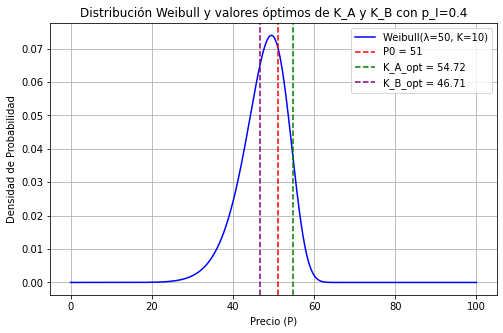

K_A óptimo: 54.72
K_B óptimo: 46.71
Máximo Expected Revenue: -0.77


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import minimize
from scipy.integrate import quad

# Parámetros de la distribución Weibull
lambda_ = 50  # Escala
k = 10  # Forma
P0 = 51  # Precio de referencia
p_I = 0.4  # Probabilidad de información

# Función de densidad de la distribución Weibull
def weibull_pdf(S):
    return weibull_min.pdf(S, k, scale=lambda_)

# Función de revenue esperada
def expected_revenue(params):
    K_A, K_B = params
   
    S_KA = K_A - P0
    S_KB = P0 - K_B
    
    PLB = 0.5 - 0.08 * S_KA
    PLS = 0.5 - 0.08 * S_KB
    
    int_KA = quad(lambda s: weibull_pdf(s) * (s - P0), K_A, np.inf)[0]
    int_KB = quad(lambda s: weibull_pdf(s) * (P0 - s), 0, K_B)[0]
    
    term1 = (1 - p_I) * ((K_A - P0) * PLB + PLS * (P0 - K_B))
    term2 = p_I * (int_KA + int_KB)
    
    return -(term1 - term2)  # Negativo porque scipy.minimize minimiza por defecto

# Definir límites para la optimización
bounds = [(P0, None), (0, P0)]
S = np.linspace(0, 100, 1000)  # Valores para simular los precios

# Optimización de K_A y K_B
initial_guess = [P0 + 2, P0 - 2]
result = minimize(expected_revenue, initial_guess, bounds=bounds)
K_A_opt, K_B_opt = result.x
max_revenue = -result.fun

# Generar valores de la distribución
x = np.linspace(0, 100, 1000)
pdf = weibull_pdf(x)

# Graficar la distribución y los valores óptimos
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f'Weibull(λ={lambda_}, K={k})', color='blue')
plt.axvline(P0, color='red', linestyle='--', label=f'P0 = {P0}')
plt.axvline(K_A_opt, color='green', linestyle='--', label=f'K_A_opt = {K_A_opt:.2f}')
plt.axvline(K_B_opt, color='purple', linestyle='--', label=f'K_B_opt = {K_B_opt:.2f}')
plt.xlabel('Precio (P)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Weibull y valores óptimos de K_A y K_B con p_I=0.4')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
print(f'K_A óptimo: {K_A_opt:.2f}')
print(f'K_B óptimo: {K_B_opt:.2f}')
print(f'Máximo Expected Revenue: {max_revenue:.2f}')

## Conclusions

## References